In [12]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
import matplotlib.pylab as plt

In [13]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [14]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [15]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

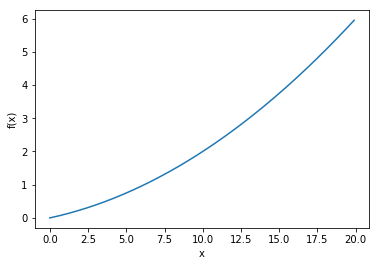

In [16]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [21]:
def numrical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [35]:
print(numrical_diff(function_1, 5))
print(numrical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


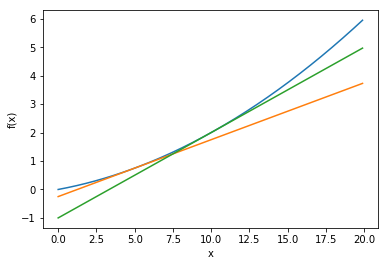

In [39]:
def tangent_line(f, x):
    d = numrical_diff(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

t2f = tangent_line(function_1, 10)
y3 = t2f(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)
plt.show()

In [32]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [43]:
# f(x0, x1) = x0**2 + x1**2
# x0 = 3, x1 = 4 の時のx0に対する偏微分

def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

print(numrical_diff(function_tmp1, 3.0))

6.00000000000378


In [41]:
# f(x0, x1) = x0**2 + x1**2
# x0 = 3, x1 = 4 の時のx1に対する偏微分
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

print(numrical_diff(function_tmp2, 4.0))

7.999999999999119


In [48]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x + h)の計算
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h)の計算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val #値を元に戻す
        
    return grad

In [51]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[ 6.  8.]
[ 0.  4.]
[ 6.  0.]


In [52]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x

In [53]:
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100))

[ -6.11110793e-10   8.14814391e-10]


In [54]:
# 学習率が大きすぎる例
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100))

[ -2.58983747e+13  -1.29524862e+12]


In [55]:
# 学習率が小さすぎる例
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100))

[-2.99999994  3.99999992]
